# Haberman's Survival 

> The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings   Hospital on the survival of patients who had undergone surgery for breast cancer.
  The notebook contain the EDA .
  The dataset can be downloaded from https://www.kaggle.com/gilsousa/habermans-survival-data-set
  
  For more factual details about breast cancer<br> 
  https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes<br>
  https://www.youtube.com/watch?v=FTH56ifHt28 

<h3> Attributes Discription </h3>

</h3>
<ul>
    <li><b>age</b>:  Age of the patient when operation was conducted</li>
    <li> <b>year</b>: Patient's year of operation(year-1900)</li>
 <li><b> nodes</b>: Number of positive auxillary nodes detected</li>
 <li> <b>status</b>: Survival status:</li>
     <ul>
         <li><b>1:</b>The patient survived 5 years or longer </li>
         <li><b>2:</b>The patient died within 5 years</li>
    </ul>
</ul>
      
</h3>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #warnings
warnings.filterwarnings("ignore")

<h3>Objective </h3>

>* Survival of patients who had undergone surgery for breast cancer

In [5]:
data=pd.read_csv('Assignment4_data.csv')           
print(data.shape)
data.head()

<IPython.core.display.Javascript object>

(306, 4)


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


<p>The dataset contains 306 rows and 4 columns namely <b>{</b>age,year,nodes,status<b>}</b> and have no missing values</p>

In [4]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
data_class=data['status'].value_counts()
data_class

1    225
2     81
Name: status, dtype: int64

Since the distributin of the class is not balanced ,as class 1 is almost 3 times of class 2.Lets see how the distribuion varies

In [8]:
one_=data.loc[data['status']==1]
two_=data.loc[data['status']==2]

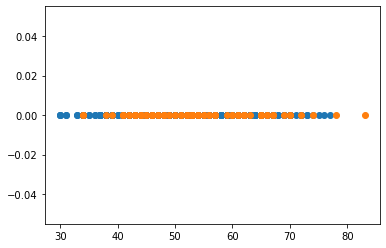

In [9]:
plt.plot(one_['age'],np.zeros_like(one_.age),'o')
plt.plot(two_['age'],np.zeros_like(two_.age),'o')

 The data points of both the class are overlapping ,thus univariate analysis does not give any intuition about the dsitribution of both classes

<Figure size 720x720 with 0 Axes>

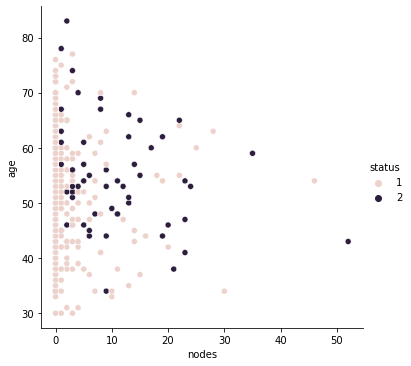

In [3]:
plt.figure(figsize=(10,10))
sns.relplot(data=data,x='nodes',y='age',hue='status')

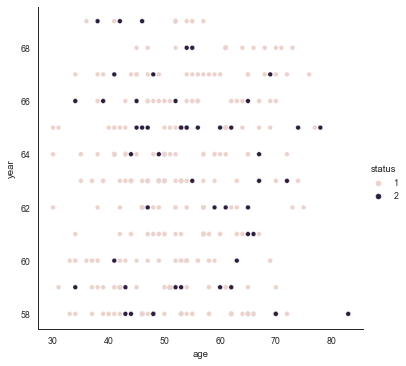

In [21]:
sns.relplot(data=data,x='age',y='year',hue='status')

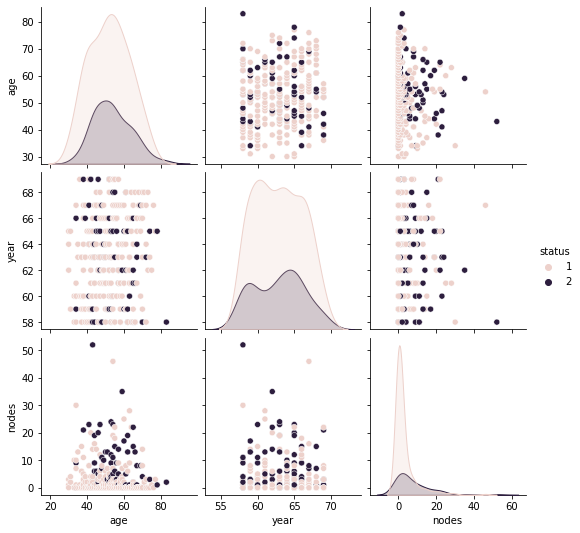

In [8]:
sns.pairplot(data=data,hue='status')

The pairplot shows the relationship for (n,2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.
we got the 9 pair of plots which summaries:
* age and year didnt show any divese realtionship 
* nodes and age do give some insights which need further exploration,
* relationship b/w year and nodes are not trivial
<p>People who has 0 nodes almost every one survived more than 5 years



In [10]:
people_die_0=data.loc[(data['nodes']==0 ) & (data['status']==1)].shape[0]
print("percentage of people survived >5 yrs having 0 nodes {} and it constitues {} %percentage".format(data_class[1]-people_die_0,(data_class[1]-people_die_0,)/data_class[1]))

percentage of people survived >5 yrs having 0 nodes 108 and it constitues [0.48] %percentage


<h3> Probability density function </h3>

>Pdf is the smoothened form of histogram.It is a function whose value at any given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample.

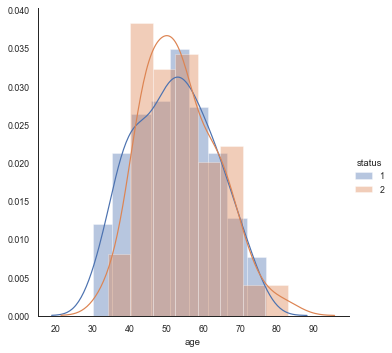

In [18]:
sns.set_context("paper") 
sns.set_style('white')
sns.FacetGrid(data,hue="status",size=5).map(sns.distplot,'age').add_legend();
plt.show()



In [16]:
sns.set_context() 

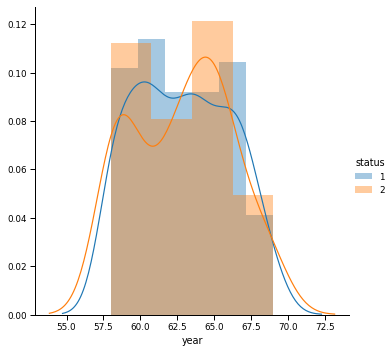

In [123]:
sns.FacetGrid(data,hue="status",size=5).map(sns.distplot,'year').add_legend()
plt.show()

[]

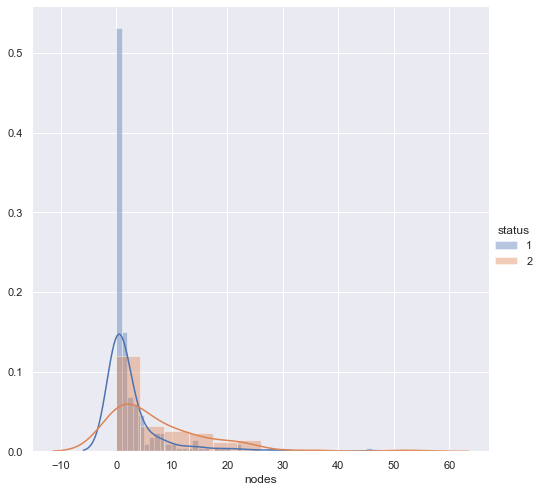

In [10]:
sns.set_theme()
sns.FacetGrid(data=data,hue='status',size=7).map(sns.distplot,'nodes').add_legend()
plt.plot()

<b> Observation:</b><br>
    The person having 0 nodes survivved more than 5 years<br>
    The person having less than 3 nodes have high chances of  survival
    

<h3>PDF & CDF</h3>

In [24]:
one_=data.loc[data['status']==1]
two_=data.loc[data['status']==2]

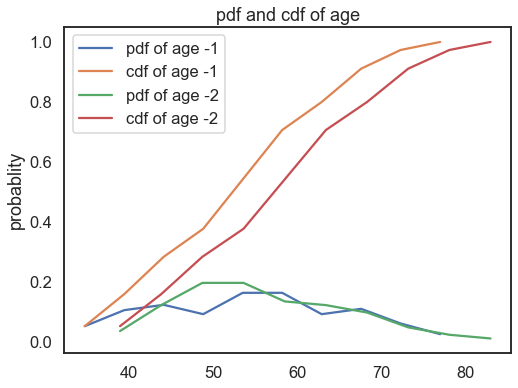

In [25]:
plt.figure(figsize=(8,6))

sns.set_context("talk")
counts,bin_edge=np.histogram(one_['age'],bins=10,density=True)
pdf=counts/sum(counts)
label=["pdf of age -1","cdf of age -1","pdf of age -2","cdf of age -2"]
cdf=np.cumsum(pdf)
# plt
plt.ylabel("probablity")
plt.title("pdf and cdf of age")
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts1,bin_edge1=np.histogram(two_['age'],bins=10,density=True)
pdf1=counts1/sum(counts1)
cdf1=np.cumsum(pdf)
plt.plot(bin_edge1[1:],pdf1)
plt.plot(bin_edge1[1:],cdf1)
plt.legend(label,loc="upper left")




<b> Observation</b>
       <p>if age<40 probabality of people to survive more than 5 years are high as people with class 2 start near age 40 
       as the age increases there is not clear view ,but probablity that eg at age 50 probablity that person will              belong to class 2 is only around 35% & 40% chance to belong to class 2 ,so there is high percentage of about 60-           65% to get the prediction wrong</p>

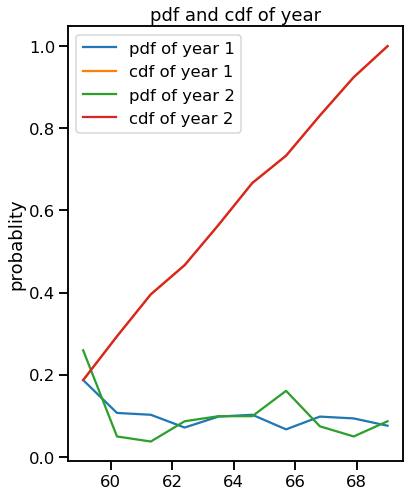

In [82]:
plt.figure(figsize=(6,8))
sns.set_context("talk")
counts,bin_edge=np.histogram(one_['year'],bins=10,density=True)
pdf=counts/sum(counts)
label=["pdf of year 1","cdf of year 1","pdf of year 2","cdf of year 2"]
cdf=np.cumsum(pdf)
plt.ylabel("probablity")
plt.title("pdf and cdf of year")
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts1,bin_edge1=np.histogram(two_['year'],bins=10,density=True)
pdf1=counts1/sum(counts1)
cdf1=np.cumsum(pdf)
plt.plot(bin_edge1[1:],pdf1)
plt.plot(bin_edge1[1:],cdf1)
plt.legend(label,loc="upper left")

<ol><li> Do not give any facts

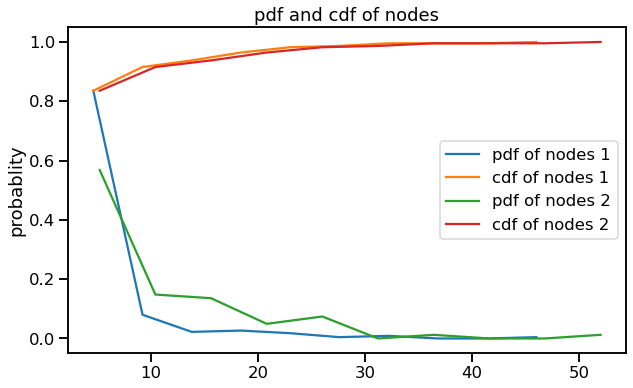

In [81]:
plt.figure(figsize=(10,6))
sns.set_context("talk")
counts,bin_edge=np.histogram(one_['nodes'],bins=10,density=True)
pdf=counts/sum(counts)
label=["pdf of nodes 1","cdf of nodes 1","pdf of nodes 2","cdf of nodes 2"]
cdf=np.cumsum(pdf)
plt.ylabel("probablity")
plt.title("pdf and cdf of nodes")
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts1,bin_edge1=np.histogram(two_['nodes'],bins=10,density=True)
pdf1=counts1/sum(counts1)
cdf1=np.cumsum(pdf)
plt.plot(bin_edge1[1:],pdf1)
plt.plot(bin_edge1[1:],cdf1)
plt.legend(label,loc="lower middle")

<p>From the above we can infer that<br>
<p><ol><li>People having lower nodes have higher probablity of survival,especially nodes lesser than 5 have higher chances to belong to class1<br></li>
    
<li>100% chance people having nodes>40 to belong to class 2
  </li></ol>

<h3> Boxplot</h3>

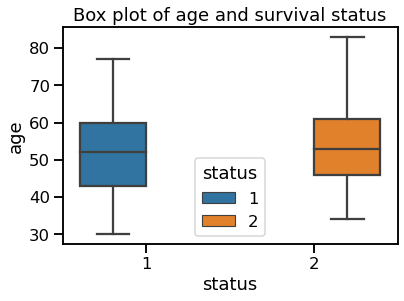

In [106]:
sns.boxplot(x="status",y='age',hue='status',data=data).set_title("Box plot of age and survival status");

The box plot fairly shows about approximate coinciding of the mean of both class ,As show earlier also the people belonging to class ranges from [30 -78](approx) whereas for class 2 it ranges from [35-85]

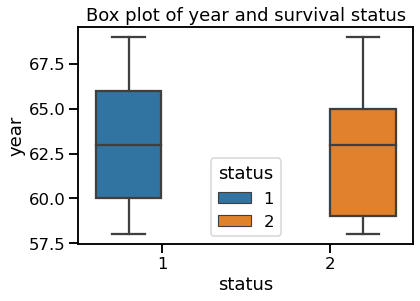

In [107]:
sns.boxplot(x='status',y='year',hue='status',data=data).set_title("Box plot of year and survival status");

<IPython.core.display.Javascript object>

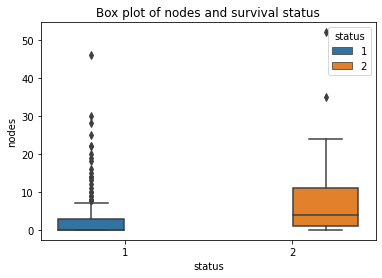

In [13]:
sns.boxplot(x='status',y='nodes',hue='status',data=data).set_title("Box plot of nodes and survival status");

In [6]:
one_=data.loc[data['status']==1]
two_=data.loc[data['status']==2]

In [10]:
one_.nodes.describe()

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: nodes, dtype: float64

In [12]:
two_.nodes.describe()

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: nodes, dtype: float64

11 people belong to class2 which is 75% of people survived less than 5 yrs<br>
3 people belong to class1 which is 75% of people survives more than 5 yrs<br>
1 people belong to class2 while zero person belong to class1 with 25% of data<br>
person with higher nodes have less survival chances

<h3>ViolinPlot</h3>

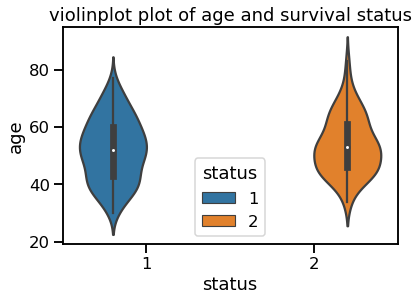

In [109]:
sns.violinplot(x="status",y='age',hue='status',data=data).set_title("violinplot plot of age and survival status");

<IPython.core.display.Javascript object>

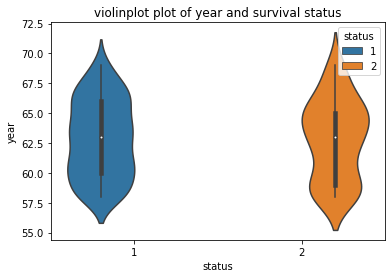

In [15]:
sns.violinplot(x="status",y='year',hue='status',data=data).set_title("violinplot plot of year and survival status");

<IPython.core.display.Javascript object>

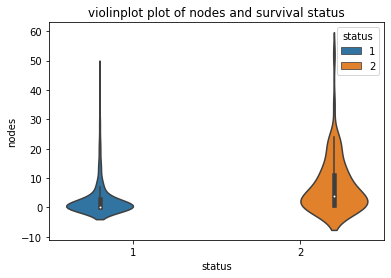

In [14]:
sns.violinplot(x="status",y='nodes',hue='status',data=data).set_title("violinplot plot of nodes and survival status");
# plt.legend(loc="left middle")

1. The spread of people with long survival is more near 0
2. The spread of people with low survival is more near 2-3
3. The whisker of class1 extend upto 0 to 9
4. The whisker of class2 extend upto 20-23

<h3> Summary</h3>


<p>
What i analyzed that <b>Age</b> and <b>Nodes</b> ,primarly Nodes could be used as as chief feature ,but round over no 3 features are purely self discriptive,which means there has to more fetaure exploration ,to add to the model for the factual prediction</p>
<p>
The number of nodes is inversly proportional to the survival chances or probabality
    </p>